# Simple Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

We would like to solve the equations of motion for a particle of mass m under the harmonic potential. First we will investigate the analytical solution. Then, we will use the Verlet algorithm which we built previously. Finally, we will try to interpolate the given data set.

First, we would like to build the problem analytically, then try to interpret the data we are provided with. We have a particle of mass m under the harmonic potential whose position and velocity is determined as below.

$$x(t) = x(0) \cos(\omega t)$$
$$\dot x(t) = -\omega x(0)\sin(\omega t)$$

The total energy is given by $E = K + U $ where $K = \frac{1}{2} m \dot x^2(t)$ and $U = \frac{1}{2} m \omega^2 x^2(t) $. By the conservation of energy, we know that $E$ is constant over time.

## Analytical Solution

In [44]:
# Building the problem analytically

x0, v0, m, k = 1, 0, 1, 1 
w = (k/m)**0.5
t = np.linspace(0,20,100)
x = x0*np.cos(w*t)
v = -x0*w*np.sin(w*t)
U = 0.5*k*x**2
K = 0.5*m*v**2
E = K + U

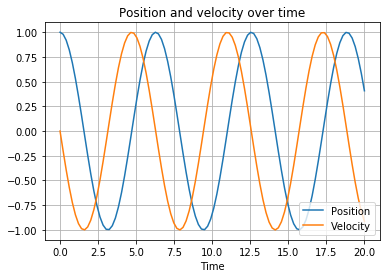

In [45]:
# Plot the position and velocity over time

plt.plot(t,x,label="Position")
plt.plot(t,v,label="Velocity")
plt.title("Position and velocity over time")
plt.xlabel("Time")
plt.grid()
plt.legend(loc="lower right")
plt.show()

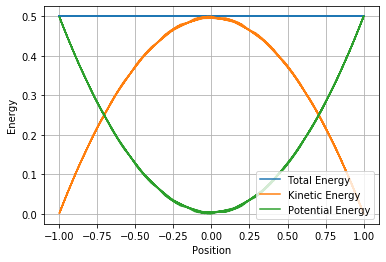

In [46]:
# Plot the energy over position

plt.plot(x,E,label="Total Energy")
plt.plot(x,K,label="Kinetic Energy")
plt.plot(x,U,label="Potential Energy")
plt.xlabel('Position')
plt.ylabel('Energy')
plt.grid()
plt.legend(loc="lower right")
plt.show()

Now we try to calculate the derivative of the potential with respect to position at a given point

In [47]:
def derive(V,x,i):
    """
    This function returns the first derivative of V with respect to x at a given point i
    """
    if i in range(len(x)):
        if i == 0:
            g = (V[1] - V[0]) / (x[1] - x[0])
        elif i == len(x) - 1:
            g = (V[-1] - V[-2]) / (x[-1] - x[-2])
        else:
            g = (V[i+1] - V[i-1]) / (x[i+1] - x[i-1])
    
    return g

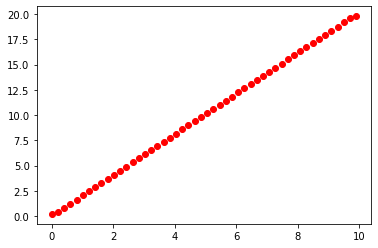

In [48]:
# a few lines to test the function derive()

y = np.linspace(0,10)
f_y = y**2
for i in range (len(y)):
    plt.plot(t[i],derive(f_y,y,i),'ro')


## Verlet Algorithm

In [49]:
def Verlet (x,V,time_step):
    """
    This function takes 3 inputs: Position(x), potential(V), and the time step
    
    It returns the solution (xt) of the equation of motion for a particle of mass m
    """
    
    dt = time_step
    i = 0                    # initialise iteration variable 
    xt = []
    m = 1
    
    for i in range(len(x)):                     
        
        a = -derive(V,x,i)/m                       # define acceleration 
        
        if i == 0:            # we need at least two values of x to use the integrator
            
            x_inc = x[i] + 0.5*(dt)**2 * a               # Taylor expansion (assuming zero initial velocity)
            
            # if there is an initial velocity, uncomment the line below, and add v_init as an input
            
            #x_inc = x[i] + dt*v_init + 0.5*(dt)**2 * a     
         
        
        else:             # use Verlet integrator
            
            x_inc = 2*x[i] - x[i-1] + (dt)**2 * a
            
        xt.append(x_inc)     # append the incremented value of x to the existing list
        
        
    return(xt)             # return the solution

In [50]:
x_test = np.linspace(0,100,100)
V_test = x**2
x_verlet = Verlet(x_test,V_test,0.01)

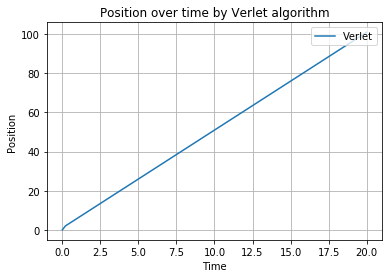

In [51]:
plt.plot(t,x_verlet,label="Verlet")
plt.title("Position over time by Verlet algorithm")
plt.xlabel("Time")
plt.ylabel("Position")
plt.grid()
plt.legend(loc="upper right")
plt.show()